In [1]:
from prony.prony import prony

from prony.TimeDomainData import TimeDomainData

from prony.fitting import (
    get_gammas_and_t,
    get_gamma_matrix, 
    get_correlation_function_matrix,
    get_freq_matrix,
    get_expn,
    optimize
)

from prony.spectral import BO
from prony.spectral import get_spectral_function_from_exponentials
from prony.spectral import bose_function

In [2]:
import numpy as np

In [3]:
beta = 1 / 10
data = TimeDomainData(BO, bose_function, beta, tf=100)

nmode_real = 1
nmode_imag = 2
expn, etal = prony(data, nmode_real, nmode_imag)

2023-11-26 11:40:08 [info     ] Staring the prony fitting program.
2023-11-26 11:40:08 [info     ] Building the Hankel matrix and running Takagi factorization...
2023-11-26 11:40:12 [info     ] The Hankel process is done!
2023-11-26 11:40:12 [info     ] <Hankel dim=1000, with Takagi factorization error (real: 5.519876521367436e-10, imag: 1.1186056697105336e-10)>
2023-11-26 11:40:12 [info     ] Solving for the gamma values from the eigen values...
2023-11-26 11:40:31 [info     ] The gamma and t values are solved!
2023-11-26 11:40:31 [info     ] gamma: [0.92538926+0.j         0.9743957 -0.04221896j 0.9743957 +0.04221896j]; t: [-155.08161263 +0.j          -50.        -86.60254038j
  -50.        +86.60254038j].
2023-11-26 11:40:31 [info     ] Preparing the matricies for Prony optimization...
2023-11-26 11:40:31 [info     ] Start the minimization...
2023-11-26 11:40:31 [info     ] The dimension for the Q matrix is (6, 6)
     pcost       dcost       gap    pres   dres
 0: -4.8728e+02 -1.113

In [4]:
etal

array([-4.55498286e-05+5.92508452e-12j,  1.05856889e+01+5.76870675e+00j,
        9.43098832e+00-5.76870675e+00j])

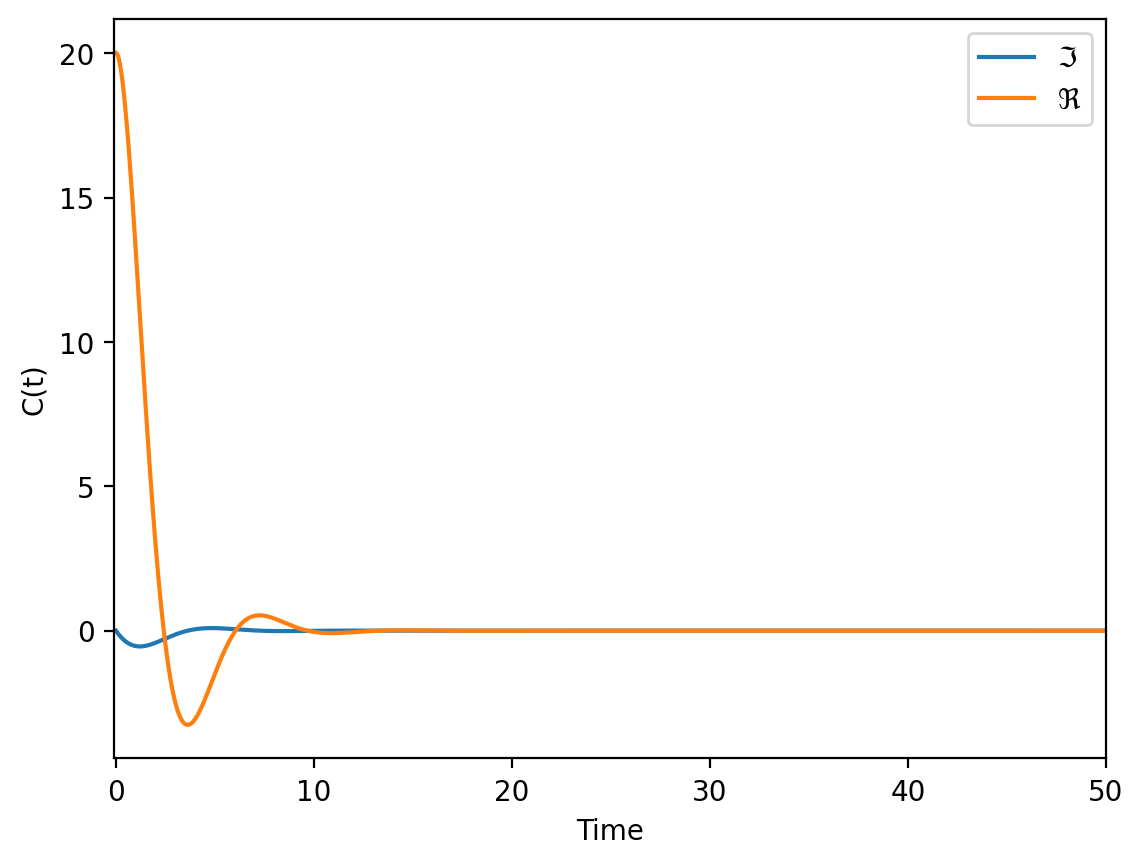

In [5]:
data.plot()

In [6]:
len_ = 10000
spe_wid = 10

w = np.append(np.linspace(-spe_wid, 0, len_), np.linspace(0, spe_wid, len_))
jw_exact = BO(w) * bose_function(w, beta)
jw_prony = get_spectral_function_from_exponentials(w, expn, etal).real

In [7]:
import matplotlib.pyplot as plt

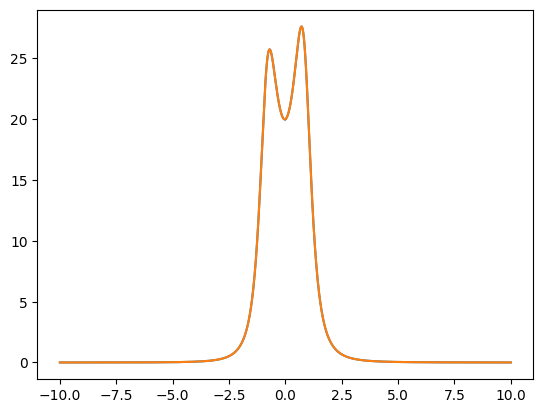

In [8]:
plt.plot(w, jw_exact)
plt.plot(w, jw_prony)

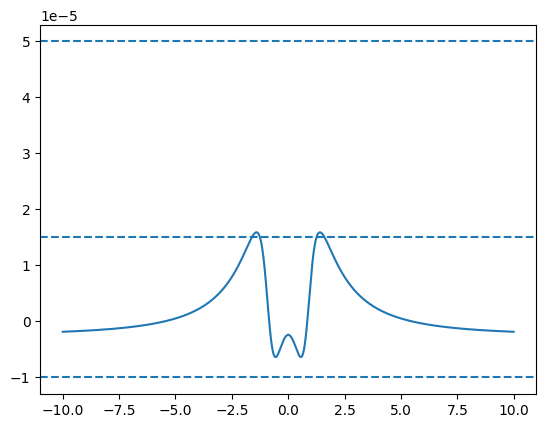

In [9]:
plt.plot(w, jw_exact - jw_prony)
plt.axhline(1.5e-5, ls='--')
plt.axhline(5e-5, ls='--')
plt.axhline(-1.0e-5, ls='--')